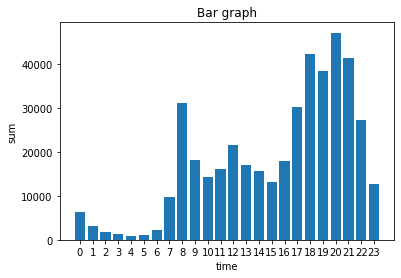

[6360, 3031, 1766, 1221, 822, 1128, 2230, 9806, 31166, 18023, 14342, 16067, 21458, 17013, 15569, 13156, 17892, 30226, 42133, 38424, 47030, 41282, 27107, 12744]
总共统计数量 429996 


In [1]:
%matplotlib inline
import pymysql
import time
from matplotlib import pyplot as plt
config={
    "host":"127.0.0.1",
    "user":"root",
    "password":"bnwt!@#123",
    "database":"bnwt"
}
x_data=[x for x in range(24)]
y_data=[x*0 for x in range(24)]
db = pymysql.connect(**config)
# 使用 cursor() 方法创建一个游标对象 cursor
cursor = db.cursor()
#查询数据库获取数据源
def selectTable(conn,cur,table):
    # sql="select COLUMN_NAME from information_schema.COLUMNS where table_name = 'test'"
    sql = "select id,pay_time,create_time,type from bnwt_card_charge where status=1 or status=2 order by id asc "
    sta = cur.execute(sql)
    
    res=cur.fetchall()
#     index=cur.description
#     print(index)
    conn.commit()
    return (res)
#查询充电记录表格获取数据源
def getChargeNums(conn,cur,table):
    
    sql = "select id,pay_time,create_time from bnwt_pay where status=1 order by id asc "
    sta = cur.execute(sql)
    res=cur.fetchall()
    conn.commit()
    return (res)
# res=selectTable(db,cursor,'photos')
res=getChargeNums(db,cursor,'pay')
# print(res)
# quit()
count=0
for i in res:
    count=count+1
#     timeArray = time.localtime(i[1])#pay_time
    timeArray = time.localtime(i[2])#create_time
    #转换成时间点
    hour = time.strftime("%H", timeArray)
#     if count<500:
    if 1:
        for h in x_data:
            if int(hour)==h:
#                 print("%s相同 %s %s" % (count,h,hour))
                y_data[h]=y_data[h]+1

#绘制bar图标便于分析情况
def show_bar(x_data,y_data):
    plt.bar(x_data, y_data, align =  'center') 
    plt.xticks(x_data)
    plt.title('Bar graph') 
    plt.ylabel('sum') 
    plt.xlabel('time') 
    plt.show()
show_bar(x_data,y_data) 

all_nums=0
print(y_data)
for i in y_data:
    all_nums+=i

print("总共统计数量 %s "% (all_nums))
    